In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
from distgen.generator import Generator
from distgen.plot import plot_dist2d, plot_dist1d, plot_current_profile
from distgen.physical_constants import unit_registry
from matplotlib import pyplot as plt
import yaml

In [3]:
gen = Generator(verbose=0) 
units = {'x':'mm', 'y':'mm', 'px':'keV/c', 'py':'keV/c', 't':'ps', 'q':'pC', 'I':'A'}

# Radial Distributions
----------------------

# Radial Uniform
Typical usage is shown below for a uniformly filled ring:

Distribution format: gpt
Output file: rad.uniform.out.txt

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 10 pC.
   Number of macroparticles: 100000.
   Assuming cylindrical symmetry...
   r distribution: radial uniform
      min_r = 1 mm, max_r = 2 mm
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: Gaussian
      avg_t = 0.5 ns, sigma_t = 2.000 ns
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 276.857 eV/c
   py distribution: Gaussian
      avg_py = 0 eV/c, sigma_py = 276.857 eV/c
   pz distribution: Gaussian
      avg_pz = 0 eV/c, sigma_pz = 276.857 eV/c
   Shifting avg_x = -2.95028E-05 mm -> 0 mm
   Scaling sigma_x = 1.11801 mm -> 1.11803 mm
   Shifting avg_y = -1.99416E-06 mm -> 0 mm
   Scaling sigma_y = 1.11803 mm -> 1.11803 mm
   Shifting avg_px = -0.0379046 eV/c -> 0 eV/c
   Scaling sigma_px = 276.852 eV/c -> 276.857 eV/c
   Shifting avg_py = -0.0437018 eV/c -> 0 eV/c
   Scal

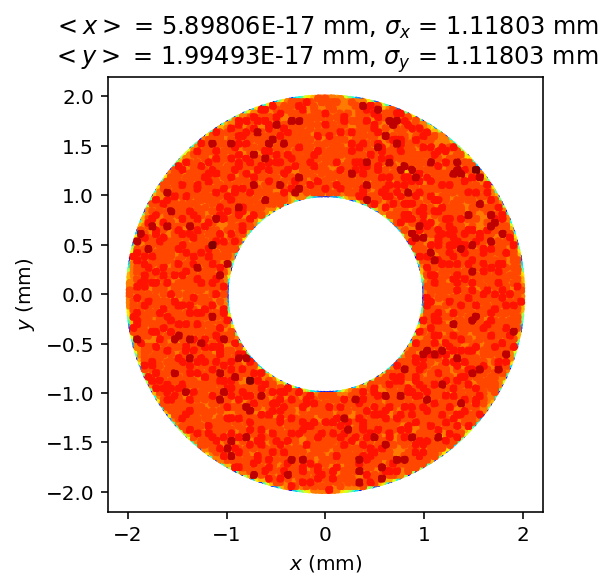

In [4]:
gen=Generator('data/rad.uniform.in.yaml',verbose=1)
beam = gen.beam()
print('\nYAML input:')
print(yaml.dump({'r_dist':gen.input['r_dist']}))

plot_dist2d(beam, 'x', units['x'], 'y', units['y'], axis='equal', title_on=True);

# Radial Gaussian (with Truncation)

Here three examples are provided: a non-truncated Gaussian with $\sigma_{x,y}$ = 2 mm, followed by a truncated Gaussian using a truncation fraction to specify the maximal radial cut, followed by a truncated Gaussian using n_sigma_cutoff to specify the radial cut.

Example 1: canonical Gaussian with $\sigma_{x,y}$ = 2mm


YAML input:
r_dist:
  sigma_xy:
    units: mm
    value: 2
  type: radial_gaussian



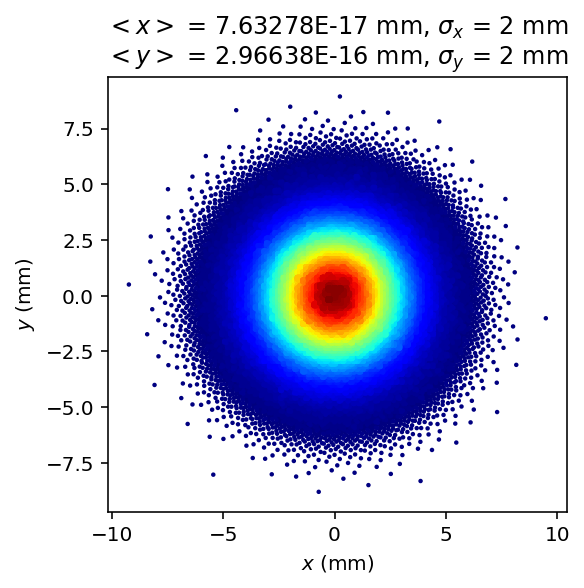

In [5]:
# Radial gaussian distribution with sigma_xy 2 mm
gen=Generator('data/rad.gaussian.in.yaml',verbose=0)
beam = gen.beam()

print('\nYAML input:')
print(yaml.dump({'r_dist':gen.input['r_dist']}))

# X-Y Plot
plot_dist2d(beam, 'x', units['x'], 'y', units['y'], axis='equal', title_on=True);

Example 2: Truncated Gaussian with a pinhole radius of 1 mm, clipped at 50% intensity


YAML input:
r_dist:
  truncation_fraction:
    units: dimensionless
    value: 0.5
  truncation_radius:
    units: mm
    value: 1
  type: rg



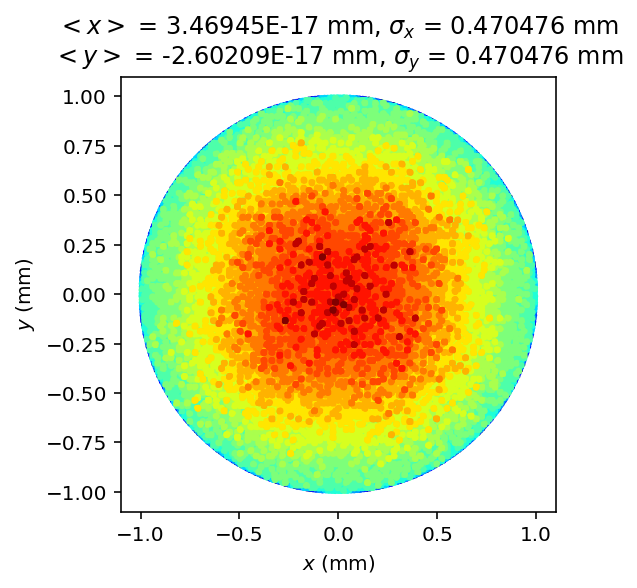

In [6]:
# Truncated radial gaussian distribution with pihole diameter of 2 mm, gaussian clipped at 50% intensity
gen=Generator('data/rad.trunc.gaussian.in.yaml',verbose=0)
beam = gen.beam()

print('\nYAML input:')
print(yaml.dump({'r_dist':gen.input['r_dist']}))

# X-Y Plot
plot_dist2d(beam, 'x', units['x'], 'y',units['y'], axis='equal', title_on=True);

Example 3: truncated Gaussian using underlying $\sigma_{x,y}$ = 2 mm and n_sigma_cutoff = 1


YAML input:
r_dist:
  n_sigma_cutoff: 1
  sigma_xy:
    units: mm
    value: 2
  type: radial_gaussian



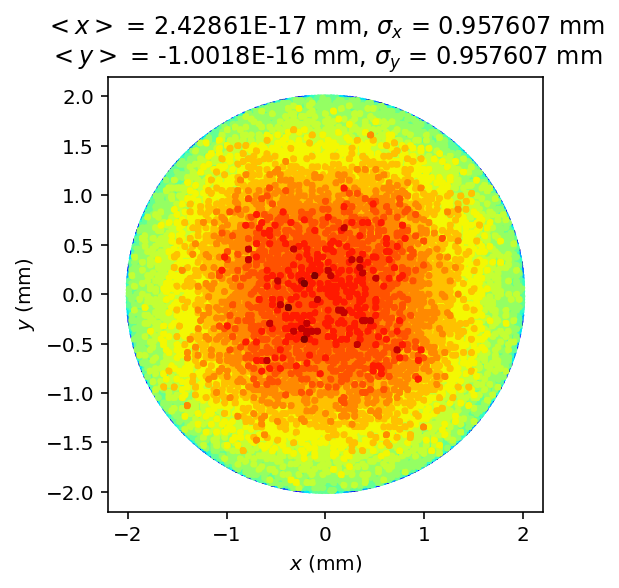

In [7]:
# Radial gaussian distribution with cut using n_sigma_cutoff
gen=Generator('data/rad.gaussian.in.yaml',verbose=0)
gen.input['r_dist']['n_sigma_cutoff'] = 1
beam = gen.beam()

print("\nYAML input:")
print(yaml.dump({'r_dist':gen.input['r_dist']}))

# X-Y Plot
plot_dist2d(beam, 'x', units['x'], 'y', units['y'], axis='equal', title_on=True);

# Radial File


YAML input:
r_dist:
  file: data/cutgauss.rad.txt
  type: radfile
  units: mm



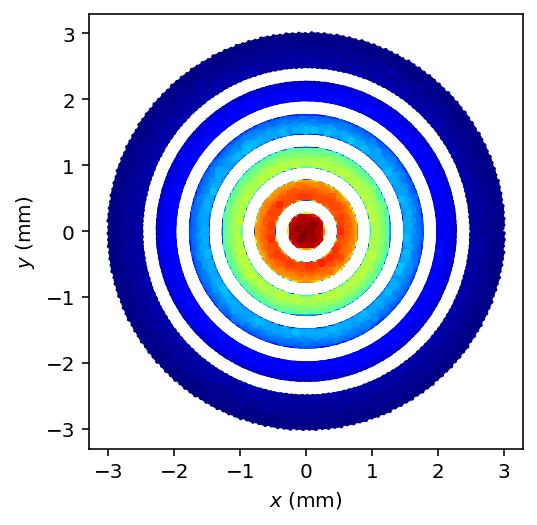

In [8]:
# Radial distribution file: a radial gaussian with cuts in it
gen=Generator('data/rad.file.in.yaml', verbose=0)
beam = gen.beam()

print('\nYAML input:')
print(yaml.dump({'r_dist':gen.input['r_dist']}))

# X-Y Plot
plot_dist2d(beam, 'x', units['x'], 'y', units['y'], axis='equal');

# Radial Tukey


YAML Input:
r_dist:
  length:
    units: mm
    value: 5
  ratio:
    units: ''
    value: 0.25
  type: radial_tukey



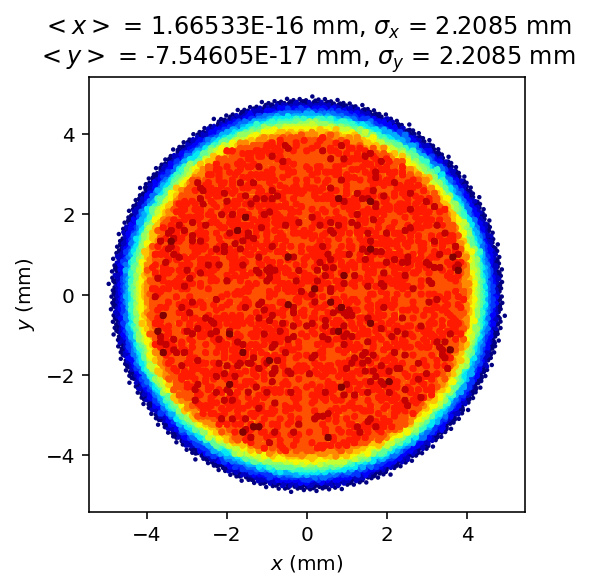

In [9]:
# Radial Tukey distribution
gen=Generator('data/tukey.beer.can.in.yaml',verbose=0)
beam = gen.beam()

print('\nYAML Input:')
print(yaml.dump({'r_dist':gen.input['r_dist']}))

plot_dist2d(beam, 'x', units['x'], 'y', units['y'], axis='equal', title_on=True);

# Radial Super Gaussian
Example 1: hyper-Gaussian (uniform) limit (power $\rightarrow\infty$): $\sigma_{x,y}$ = 1 mm


YAML Input:
r_dist:
  alpha:
    units: ''
    value: 0
  sigma_xy:
    units: mm
    value: 1
  type: rsg



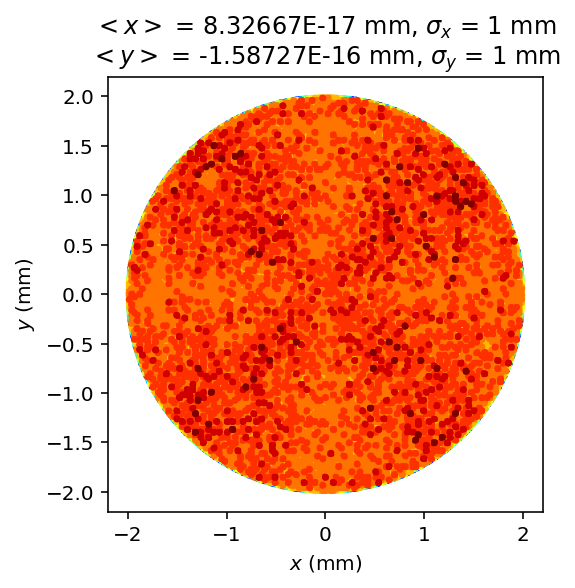

In [10]:
gen=Generator('data/SG.beer.can.in.yaml',verbose=0)
beam = gen.beam()

print("\nYAML Input:")
print(yaml.dump({'r_dist':gen.input['r_dist']}))

plot_dist2d(beam, 'x', units['x'], 'y', units['y'], axis='equal', title_on=True);

Example 2: Gaussian limit (power = 1): $\sigma_{x,y}$ = 1 mm


YAML Input:
r_dist:
  alpha:
    units: ''
    value: 1.0
  sigma_xy:
    units: mm
    value: 1
  type: rsg



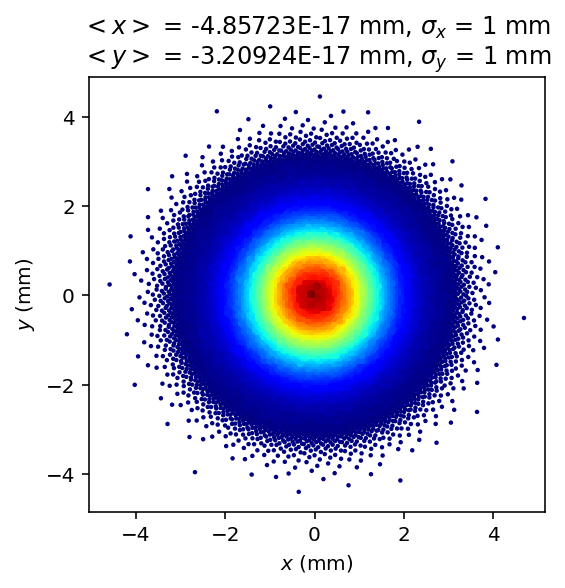

In [11]:
gen=Generator('data/SG.beer.can.in.yaml',verbose=0)
gen['r_dist:alpha:value']=1.0
beam = gen.beam()

print('\nYAML Input:')
print(yaml.dump({'r_dist':gen.input['r_dist']}))

plot_dist2d(beam, 'x', units['x'], 'y', units['y'], axis='equal', title_on=True);

Example 3: sub-Gaussian (power < 1): $\sigma_{x,y} = 1$ mm power = 0.5 


YAML Input:
r_dist:
  p:
    units: ''
    value: 0.5
  sigma_xy:
    units: mm
    value: 1
  type: rsg



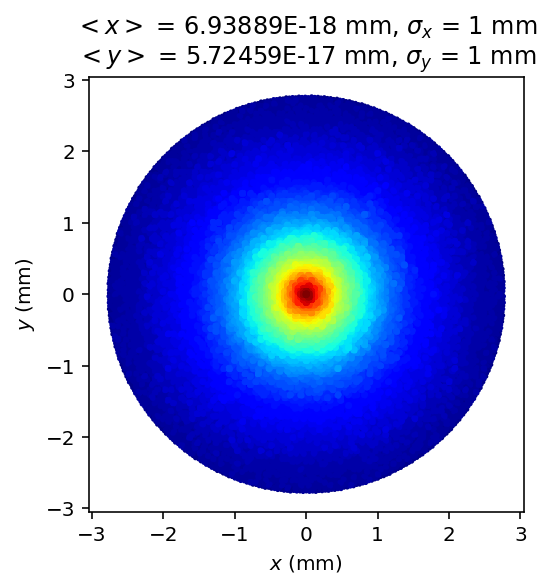

In [12]:
gen=Generator('data/SG.beer.can.in.yaml',verbose=0)
del gen.input['r_dist']['alpha']

gen.input['r_dist']['p'] = {'value':0.5,'units':''}
beam = gen.beam()

print("\nYAML Input:")
print(yaml.dump({'r_dist':gen.input["r_dist"]}))

plot_dist2d(beam, 'x', units['x'], 'y', units['y'], axis="equal", title_on=True);

# 2D Distributions
------------------

# 2D File

<disgten.Generator with input: 
n_particle: 1000000
output:
  file: rad.uniform.out.txt
  type: gpt
random_type: hammersley
start:
  MTE:
    units: meV
    value: 150
  type: cathode
total_charge:
  units: pC
  value: 10
xy_dist:
  file: data/laser.image.txt
  type: file2d

>

YAML input:
xy_dist:
  file: data/laser.image.txt
  type: file2d



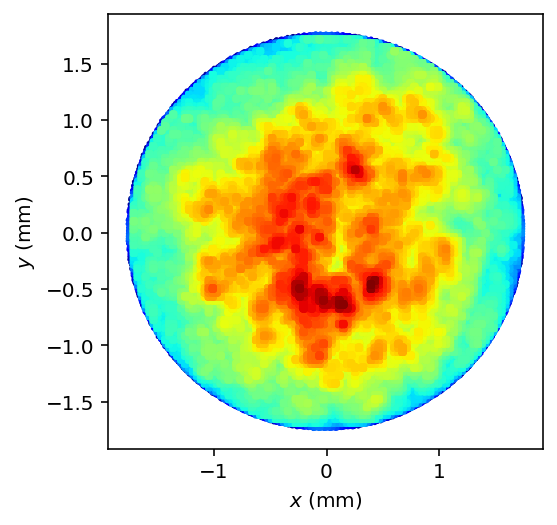

In [13]:
# 2D XY distribution: Lase Image Example
# Real laser spot image - using 1 million particles (takes a few secs)
gen=Generator('data/laser.image.in.yaml',verbose=0)
print(gen)
beam = gen.beam()

print('\nYAML input:')
print(yaml.dump({'xy_dist':gen.input['xy_dist']}))

# X-Y Plot
plot_dist2d(beam, 'x', units['x'], 'y', units['y'], nbins=100, axis='equal');

# 2D Image

If the user has an image dataset already loaded into python, they can directly pass this to Distgen using the Image2d class.  An example of how to use this in practice is given below:

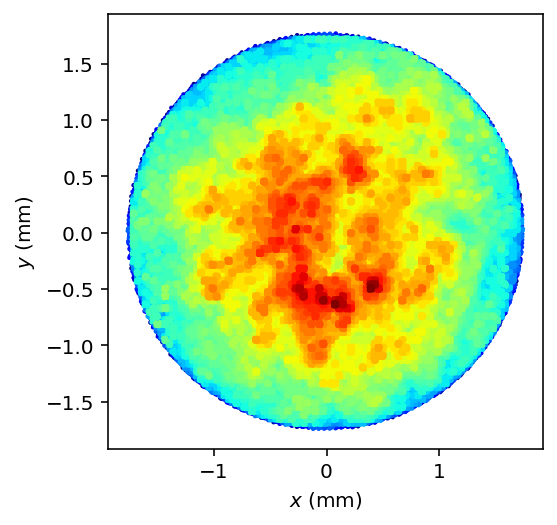

In [14]:
from distgen.tools import read_2d_file

xs, ys, Pxy, xstr, ystr = read_2d_file('data/laser.image.txt')

inputs={
    
    'n_particle': 200000,
    'total_charge': {'value':1, 'units':'pC'},
    'random_type': 'hammersley',
    'start': {
        'MTE':{'units': 'meV', 'value': 150}, 
        'type': 'cathode'
    },
    'xy_dist':{
        'type' : 'image2d',
        xstr:{'value': xs.magnitude, 'units':'mm'}, 
        ystr:{'value': ys.magnitude, 'units':'mm'}, 
        'P':Pxy
    }
}

gen=Generator(inputs,verbose=0)
beam = gen.beam()

# X-Y Plot
plot_dist2d(beam, 'x', units['x'], 'y', units['y'], nbins=100, axis='equal');

# 1D Distributions
-----------

# Uniform


YAML Input:
x_dist:
  max_x:
    units: mm
    value: 2
  min_x:
    units: mm
    value: -1
  type: uniform



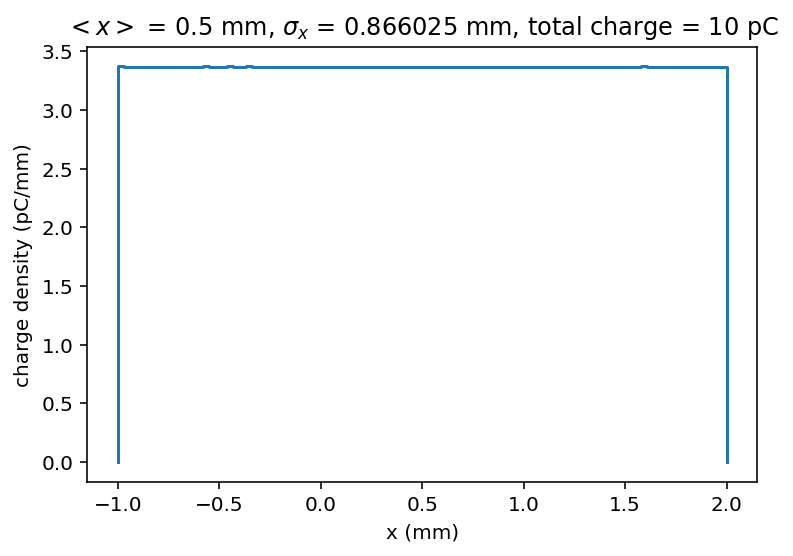

In [15]:
gen=Generator('data/x.uniform.y.file.t.gaussian.in.yaml',verbose=0)
beam = gen.beam()

print('\nYAML Input:')
print(yaml.dump({'x_dist':gen.input['x_dist']}))

plot_dist1d(beam, 'x', units['y'], nbins=100, title_on=True)


YAML Input:
t_dist:
  avg_t:
    units: ps
    value: 2.0
  sigma_t:
    units: ps
    value: 0.2886751345948129
  type: uniform



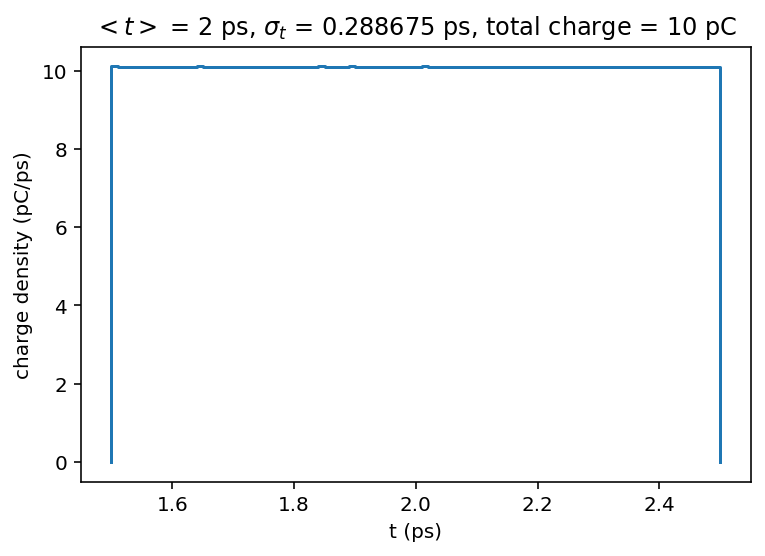

In [16]:
import numpy as np
gen['t_dist']={
    'type': 'uniform',
    'sigma_t':{
        'value': float(1/np.sqrt(12)),
        'units':'ps'
    },
    'avg_t':{
        'value':2.0,
        'units':'ps'
    }
}

beam=gen.beam()

print('\nYAML Input:')
print(yaml.dump({'t_dist':gen.input['t_dist']}))

plot_dist1d(beam, 't', units['t'], nbins=100, title_on=True)

# 1D File


YAML Input:
y_dist:
  file: data/cutgauss.1d.txt
  type: file1d
  units: mm



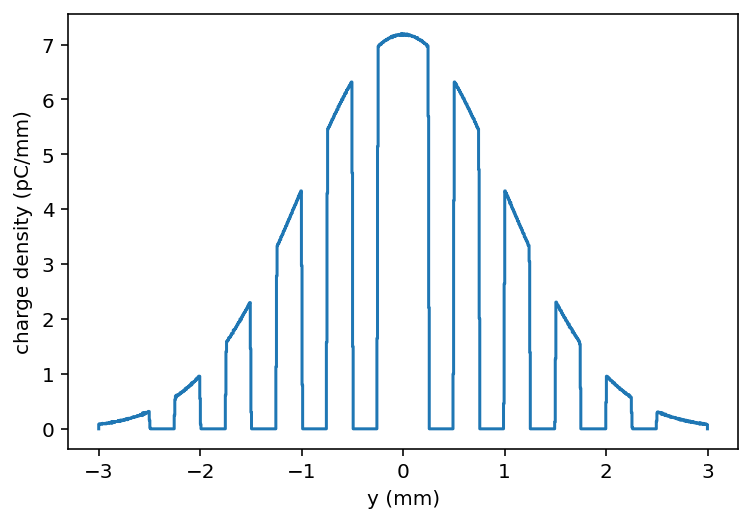

In [17]:
gen=Generator('data/x.uniform.y.file.t.gaussian.in.yaml',verbose=0)
beam = gen.beam()

print('\nYAML Input:')
print(yaml.dump({'y_dist':gen.input['y_dist']}))
plot_dist1d(beam, 'y', units['y'], nbins=1000)

# Gaussian (with Truncation)


YAML Input:
t_dist:
  avg_t:
    units: ps
    value: -0.5
  sigma_t:
    units: ps
    value: 1
  type: gaussian



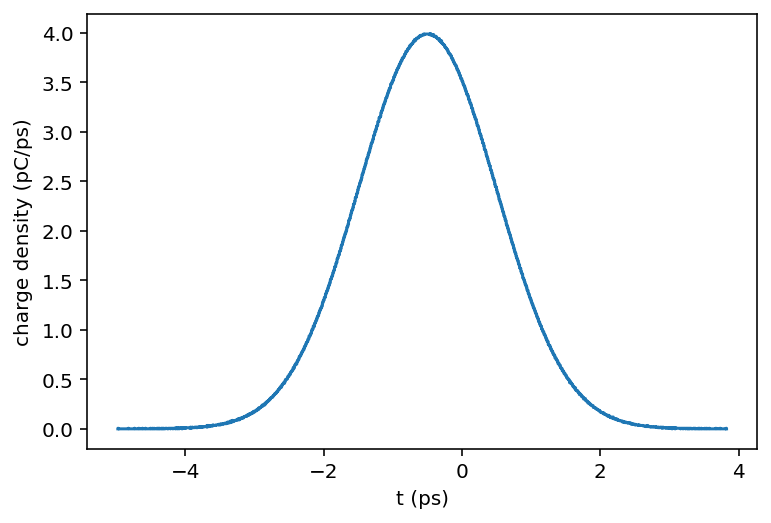

In [18]:
gen=Generator('data/x.uniform.y.file.t.gaussian.in.yaml',verbose=0)
beam = gen.beam()

print('\nYAML Input:')
print(yaml.dump({'t_dist':gen.input['t_dist']}))

plot_dist1d(beam, 't', units['t'], nbins=1000)

# Tukey 


YAML Input:
t_dist:
  length:
    units: ps
    value: 5.0
  ratio:
    units: ''
    value: 0.75
  type: tukey



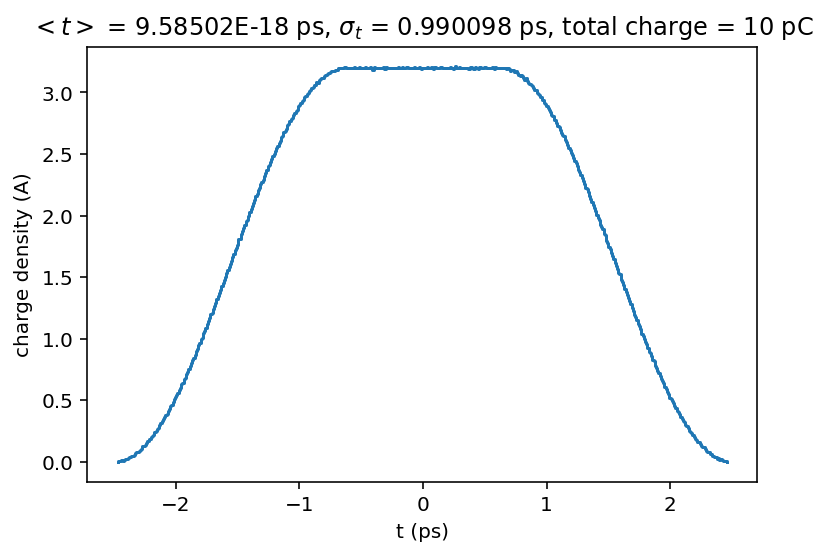

In [19]:
# Tukey distribution
gen=Generator('data/tukey.beer.can.in.yaml', verbose=0)
beam = gen.beam()

print('\nYAML Input:')
print(yaml.dump({'t_dist':gen.input['t_dist']}))

plot_current_profile(beam, units['t'], units['I'], nbins=500, title_on=True)


YAML Input:
t_dist:
  alpha:
    units: ''
    value: 0.5
  sigma_t:
    units: ps
    value: 8.0
  type: sg



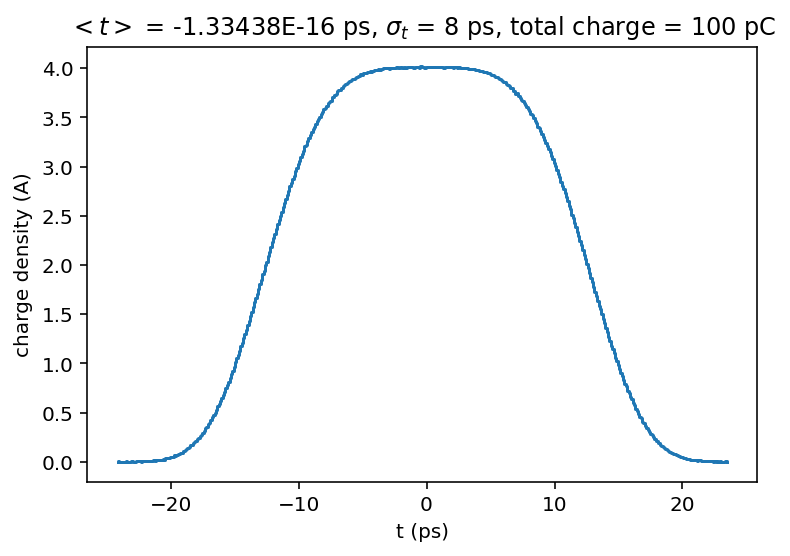

In [20]:
# Super Gaussian distribution
gen=Generator('data/SG.beer.can.in.yaml', verbose=0)
beam = gen.beam()

print('\nYAML Input:')
print(yaml.dump({'t_dist':gen.input['t_dist']}))

plot_current_profile(beam, units['t'], units['I'], title_on=True)

# Special Temporal Distributions
-------

# Pulse stacking temporal crystals


YAML Input:
t_dist:
  crystal_angle_1:
    units: deg
    value: 0.6
  crystal_angle_2:
    units: deg
    value: 1.8
  crystal_angle_3:
    units: deg
    value: -0.9
  crystal_angle_4:
    units: deg
    value: -0.5
  crystal_length_1:
    units: mm
    value: 15.096
  crystal_length_2:
    units: mm
    value: 7.548
  crystal_length_3:
    units: mm
    value: 3.774
  crystal_length_4:
    units: mm
    value: 1.887
  type: crystals



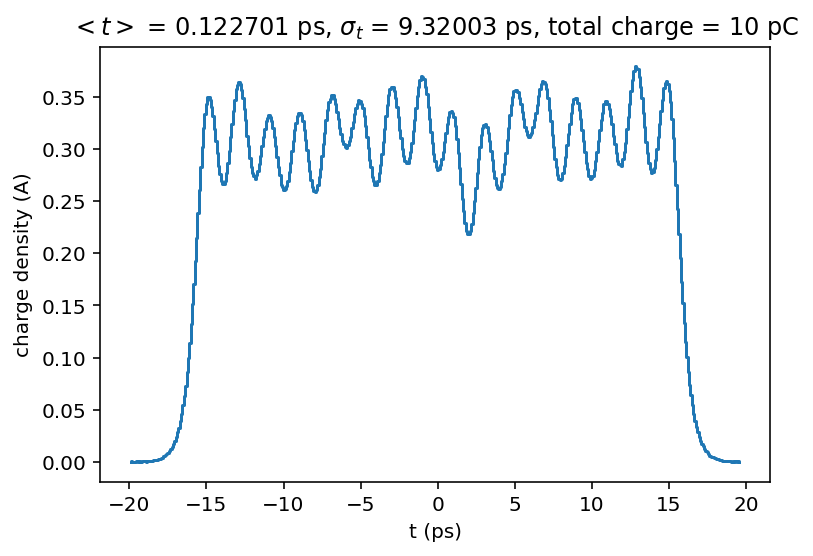

In [21]:
gen=Generator('data/t.crystals.in.yaml',verbose=0)
beam = gen.beam()
print('\nYAML Input:')
print(yaml.dump({'t_dist':gen.input['t_dist']}))
plot_current_profile(beam, units['t'], units['I'] ,title_on=True)